# Thyroid Cancer Recurrence Prediction

## Project Introduction

### Project Topic and Goal
This project focuses on predicting thyroid cancer recurrence using a patient dataset. We will apply supervised learning techniques, utilizing multiple algorithms/models, to build a model that predicts the likelihood of recurrence based on patient features. This task falls under the classification category of supervised learning.

### Importance of Prediction in the Medical Field
Predicting the likelihood of thyroid cancer recurrence is crucial in the medical field. Accurate predictions can guide clinical decisions, personalize patient management plans, and potentially improve patient outcomes. Early identification of high-risk patients can lead to timely interventions, reducing the risk of further complications and invasive treatments.

### Personal and Professional Relevance
As an anesthesiologist, I am responsible for managing various clinical data regarding patients, especially in the perioperative setting. A significant aspect of my role involves risk stratification and management to ensure patient safety. Understanding the likelihood of cancer recurrence is essential, as it directly influences decisions related to anesthesia and perioperative care. For instance, patients at high risk of recurrence might require different anesthetic management and closer postoperative monitoring. Therefore, developing a reliable model to predict recurrence can greatly enhance my ability to provide safe and effective care to my patients.

This project's outcome will not only support anesthesiologists but also benefit oncologists, surgeons, and other healthcare providers involved in the treatment and management of thyroid cancer patients. By leveraging machine learning, we aim to contribute valuable insights that can improve the overall quality of patient care.

## The Dataset: Thyroid Cancer Data

**Link:** [Differentiated Thyroid Cancer Recurrence](https://archive.ics.uci.edu/dataset/915/differentiated+thyroid+cancer+recurrence)

**Source:** [DOI: 10.1007/s00405-023-08299-w](https://doi.org/10.1007/s00405-023-08299-w)

**Authors:** Shiva Borzooei, Giovanni Briganti, Mitra Golparian, Jerome R. Lechien, and Aidin Tarokhian

**Study Details:** This dataset was compiled as part of a prospective study involving a cohort of 383 patients. These patients were observed over a minimum duration of 10 years within a 15-year timeframe.

---

### Dataset Characteristics

- **Type:** Tabular
- **Subject Area:** Health and Medicine
- **Associated Tasks:** Classification
- **Feature Types:** Real, Categorical, Integer
- **Number of Instances:** 383
- **Number of Features:** 16

---

### Purpose of the Dataset

This dataset was created for research in the fields of AI and Medicine, specifically to explore thyroid cancer recurrence.

### Representation of Instances

Each instance in this dataset represents an individual patient.

### Feature Description

- **Age:** Patient's age
- **Gender:** Patient's gender
- **Smoking Status:** Indicates if the patient is a smoker
- **Thyroid Function:** Measures related to thyroid function
- **Pathology:** Pathological findings related to thyroid cancer
- **Others**: skipped

### Importance in AI and Medicine

This dataset aids in understanding and predicting the recurrence of thyroid cancer, contributing valuable insights for medical research and improving patient care through AI-driven analysis.


## Model Approach

---

### Overview

In this project, I aim to predict thyroid cancer recurrence using supervised learning techniques. Given the critical nature of accurate predictions in healthcare, I will employ robust models that can handle missing data effectively. This approach ensures that the model remains reliable even when the dataset has incomplete information, which is often the case in real-world medical data.

---

### Models Overview

I will utilize two primary models for this project: **Logistic Regression** and **XGBoost**.

- **Logistic Regression:** This model is a staple in classification tasks and offers simplicity, interpretability, and efficiency. It's particularly useful for binary classification problems, such as predicting whether a patient will experience a recurrence of thyroid cancer.
  
- **XGBoost:** This advanced boosting algorithm is known for its high performance and flexibility. XGBoost can handle missing data internally, making it an excellent choice for healthcare datasets that often have gaps. It also provides tools for feature importance analysis, which can offer valuable insights into the factors contributing to cancer recurrence.

---

### Handling Missing Data

Before delving into the dataset, it is crucial to outline strategies for managing missing data. In healthcare, missing values can arise from various sources, such as incomplete patient records or data entry errors. Models that are robust to missing data, like XGBoost, can directly handle these gaps during training, maintaining model accuracy without extensive preprocessing.

For models that do not handle missing data natively, such as Logistic Regression, I will use imputation techniques. These might include simple methods like mean or median imputation, or more sophisticated approaches like K-Nearest Neighbors (KNN) imputation, depending on the extent and nature of the missing data.

---

### Dataset Information

To provide context for the model selection and data handling strategies, here is a summary of the dataset:

- **Number of Samples:** 383 patients
- **Number of Features:** 16
  - **Feature Types:** Real, Categorical, Integer

The dataset includes key patient information such as age, gender, smoking status, thyroid function metrics, and pathology results. These features will be critical in developing a model that can accurately predict the recurrence of thyroid cancer.

By employing models robust to missing data and using effective imputation techniques, I aim to build a reliable predictive model. This approach not only leverages the strengths of Logistic Regression and XGBoost but also addresses the practical challenges of working with healthcare data, ensuring the model's applicability in real-world scenarios.

In [1]:
import matplotlib.pyplot as plt
# imports
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

## Initial EDA
The goal of this preliminary EDA is to gain an initial understanding of the dataset before conducting extensive cleaning and analysis. This step involves inspecting the basic structure and summary statistics of the data, as well as identifying any missing values.

In [2]:
# Load the dataset
file_path = './data/Thyroid_Diff.csv'
data = pd.read_csv(file_path)

### Basic Information and Descriptive Statistics
We first display basic information about the dataset, including the data types, number of non-null entries, and memory usage. Additionally, we present descriptive statistics for both numerical and categorical features.

In [3]:
# Display the shape of the dataframe and the first few rows
data_shape = data.shape
data_head = data.head()
# Output the shape and first few rows
data_shape, data_head

((383, 17),
    Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
 0   27      F      No         No              No        Euthyroid   
 1   34      F      No        Yes              No        Euthyroid   
 2   30      F      No         No              No        Euthyroid   
 3   62      F      No         No              No        Euthyroid   
 4   62      F      No         No              No        Euthyroid   
 
           Physical Examination Adenopathy       Pathology     Focality Risk  \
 0   Single nodular goiter-left         No  Micropapillary    Uni-Focal  Low   
 1          Multinodular goiter         No  Micropapillary    Uni-Focal  Low   
 2  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
 3  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
 4          Multinodular goiter         No  Micropapillary  Multi-Focal  Low   
 
      T   N   M Stage       Response Recurred  
 0  T1a  N0  M0     I  Indeterminate

In [4]:
# Display basic information and descriptive statistics
data_info = data.info()
data_description = data.describe(include='all')

# Output basic info and description
data_info, data_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

(None,
                Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
 count   383.000000    383     383        383             383              383   
 unique         NaN      2       2          2               2                5   
 top            NaN      F      No         No              No        Euthyroid   
 freq           NaN    312     334        355             376              332   
 mean     40.866841    NaN     NaN        NaN             NaN              NaN   
 std      15.134494    NaN     NaN        NaN             NaN              NaN   
 min      15.000000    NaN     NaN        NaN             NaN              NaN   
 25%      29.000000    NaN     NaN        NaN             NaN              NaN   
 50%      37.000000    NaN     NaN        NaN             NaN              NaN   
 75%      51.000000    NaN     NaN        NaN             NaN              NaN   
 max      82.000000    NaN     NaN        NaN             NaN              NaN   
 
       

In [5]:
# Display the number of unique values for each feature
data_unique_values = data.nunique()
# identify unique values in each column
for column in data:
    print(f"Unique values in column '{column}': {data[column].unique()}")

Unique values in column 'Age': [27 34 30 62 52 41 46 51 40 75 59 49 50 76 42 44 43 36 70 60 33 26 37 55
 31 45 20 38 29 25 21 23 24 35 54 22 69 28 17 73 18 39 57 66 32 47 56 63
 19 67 72 61 68 48 81 53 58 80 79 65 15 82 71 64 78]
Unique values in column 'Gender': ['F' 'M']
Unique values in column 'Smoking': ['No' 'Yes']
Unique values in column 'Hx Smoking': ['No' 'Yes']
Unique values in column 'Hx Radiothreapy': ['No' 'Yes']
Unique values in column 'Thyroid Function': ['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']
Unique values in column 'Physical Examination': ['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']
Unique values in column 'Adenopathy': ['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']
Unique values in column 'Pathology': ['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']
Unique values in column 'Focality': ['Uni-Focal' '

In [6]:
# Summary statistics of numerical features
data.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


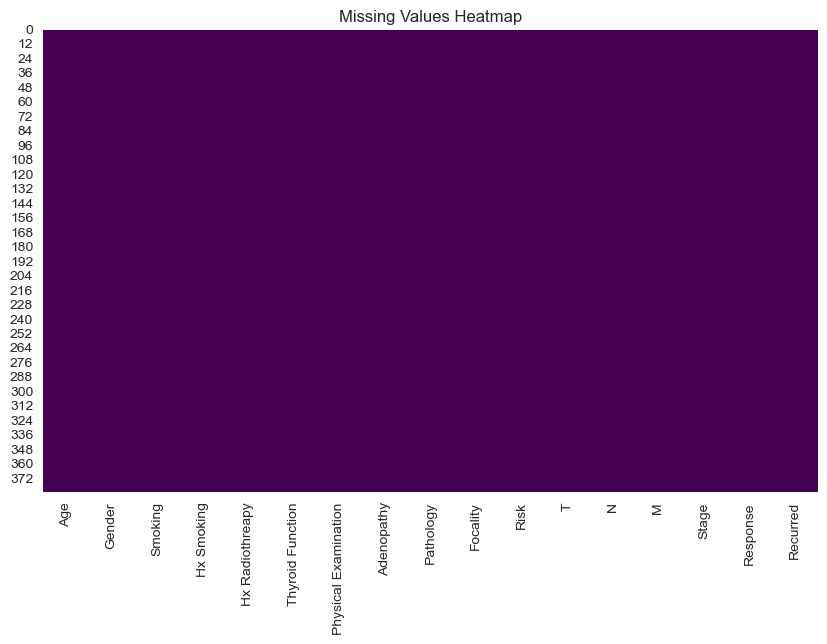

In [7]:
# Check for missing values
missing_values = data.isnull().sum()

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### Data Description

The dataset, `Thyroid_Diff.csv`, contains clinical data for 383 patients, each with 16 features. These features include demographic information, medical history, and various clinical assessments relevant to thyroid cancer recurrence.

#### Key Features:

1. **Age**: Numerical
   - Represents the age of the patient.

2. **Gender**: Binary
   - 'M' (Male)
   - 'F' (Female)

3. **Smoking**: Binary
   - 'Yes'
   - 'No'

4. **History of Smoking (Hx Smoking)**: Binary
   - 'Yes'
   - 'No'

5. **History of Radiotherapy (Hx Radiotherapy)**: Binary
   - 'Yes'
   - 'No'
   - Note: There is a typo in the original column name ('Hx Radiothreapy') which will be corrected during data cleaning.

6. **Thyroid Function**: Categorical/Ordinal
   - 'Clinical Hypothyroidism' (Underactive)
   - 'Subclinical Hypothyroidism'
   - 'Euthyroid' (Normal state)
   - 'Subclinical Hyperthyroidism'
   - 'Clinical Hyperthyroidism' (Overactive)

7. **Physical Examination**: Categorical/Ordinal
   - Examples include 'Single nodular goiter-left', 'Multinodular goiter', etc.

8. **Adenopathy**: Categorical/Binary
   - Unique values: ['No', 'Right', 'Extensive', 'Left', 'Bilateral', 'Posterior']
   - Initial binary classification: 'No' vs. everything else.
   - Further categorical breakdown: 
     - 'Right' and 'Left' can be merged into 'Unilateral'
     - 'Posterior' can be merged into 'Multifocal'
     - Other values include 'Extensive' and 'Bilateral'.

9. **Pathology**: Categorical
   - 'Micropapillary'
   - 'Papillary'
   - 'Follicular'
   - 'Hurthle cell'

10. **Focality**: Categorical
    - 'Uni-Focal'
    - 'Multi-Focal'

11. **Risk**: (ordered as below) AMES prognostic index
    - 'Low'
    - 'Intermediate'
    - 'High'

12. **T (Tumor Size and Spread)**: Ordinal
    - 'T1a'
    - 'T1b'
    - 'T2'
    - 'T3a'
    - 'T3b'
    - 'T4a'
    - 'T4b'

13. **N (Lymph Node Involvement)**: Ordinal
    - 'N0'
    - 'N1a'
    - 'N1b'

14. **M (Metastasis)**: Ordinal
    - 'M0'
    - 'M1'

15. **Stage**: Ordinal
    - 'I'
    - 'II'
    - 'III'
    - 'IVA'
    - 'IVB'
    - This follows the AJCC staging system and is derived from a combination of Age, T, N, and M. There may be interactions or collinearity between these variables.

16. **Response**: Ordinal (ordered as below)
    - 'Excellent' (best) 
    - 'Biochemical Incomplete'
    - 'Indeterminate'
    - 'Structural Incomplete' (worst) 
    - Definitions:
      - Structural incomplete: Visible cancer remains.
      - Biochemical incomplete: Abnormal blood tests, no visible cancer on imaging.
      - Indeterminate: Neither incomplete nor excellent, representing a poorly defined group.
      - Excellent: Little to no evidence of disease.

17. **Recurred**: Binary
    - 'Yes' (Target Variable)
    - 'No'

#### Initial Observations:

1. **Data Points**: The dataset contains 383 samples with 16 features each.
2. **Missing Values**: There are no apparent missing values, likely due to the dataset's clinical nature. However, data cleaning will be performed to ensure consistency and accuracy.

This detailed understanding of the dataset lays the groundwork for further data cleaning, exploratory data analysis (EDA), and model building.

# Data Cleaning Process for Thyroid Cancer Recurrence Prediction

## 1. Handling Inconsistencies and Typos
- Correct the typo in the 'Hx Radiothreapy' column name to 'Hx Radiotherapy'
- Ensure consistency in categorical variables (e.g., 'Yes'/'No' responses)

## 2. Data Type Conversions
- Convert 'Age' to numeric type if not already
- Convert binary categorical variables to numeric (0/1) for easier processing

## 3. Handling Categorical Variables
- Encode ordinal variables (e.g., 'Thyroid Function', 'Risk', 'T', 'N', 'M', 'Stage', 'Response')
- One-hot encode nominal categorical variables (e.g., 'Pathology')

## 4. Feature Engineering
- Create a new feature 'AgeGroup' based on age ranges
  - reversed since it actually makes certain regressions more complicated
- Combine 'Smoking' and 'Hx Smoking' into a single feature

## 5. Handling the 'Adenopathy' Column
- Reclassify 'Adenopathy' values into more meaningful categories

## 6. Standardization/Normalization
- Apply standardization to numerical features
 - might be useful for models but harms interpretability

## 7. Final Check
- Verify data types and structure after cleaning
- Ensure no missing values in the cleaned dataset

This cleaning process aims to prepare the data for effective exploratory data analysis and modeling while addressing potential issues in the original dataset.

In [8]:
# Handling Inconsistencies and Typos
data = data.rename(columns={'Hx Radiothreapy': 'Hx Radiotherapy'})

# Ensure consistency in binary variables
binary_cols = ['Smoking', 'Hx Smoking', 'Hx Radiotherapy', 'Recurred']
for col in binary_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

# Data Type Conversions 
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Handling Categorical Variables
# Ordinal encoding
ordinal_features = ['Thyroid Function', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']
categories = [
    [
        'Clinical Hypothyroidism',
        'Subclinical Hypothyroidism',
        'Euthyroid',
        'Subclinical Hyperthyroidism',
        'Clinical Hyperthyroidism'
    ],  # 'Thyroid Function'
    ['Low', 'Intermediate', 'High'],  # 'Risk'
    ['T1a', 'T1b', 'T2', 'T3a', 'T3b', 'T4a', 'T4b'],  # 'T'
    ['N0', 'N1a', 'N1b'],  # 'N'
    ['M0', 'M1'],  # 'M'
    ['I', 'II', 'III', 'IVA', 'IVB'],  # 'Stage'
    ['Excellent', 'Indeterminate', 'Biochemical Incomplete', 'Structural Incomplete']  # 'Response'
]

ordinal_encoder = OrdinalEncoder(categories=categories)
data[ordinal_features] = ordinal_encoder.fit_transform(data[ordinal_features])

# One-hot encoding for 'Pathology'
data = pd.get_dummies(data, columns=['Pathology'], prefix='Pathology')

# Feature Engineering
# Create age groups
# turned out to be difficult to use in regressions
# data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 20, 40, 60, 80, 100], labels=[0, 1, 2, 3, 4])

# Combine 'Smoking' and 'Hx Smoking'
data['SmokingStatus'] = data['Smoking'] | data['Hx Smoking']
data = data.drop(['Smoking', 'Hx Smoking'], axis=1)


# Handling the 'Adenopathy' Column
def reclassify_adenopathy(value):
    if value == 'No':
        return 0
    elif value in ['Right', 'Left']:
        return 1
    elif value in ['Bilateral', 'Extensive']:
        return 2
    else:
        return 3  # For 'Posterior' or any other values


data['Adenopathy'] = data['Adenopathy'].apply(reclassify_adenopathy)

# Standardization might be useful for models but harms interpretability
# numeric_features = ['Age']
# scaler = StandardScaler()
# data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Final Check
print(f"Final shape: {data.shape}")
print(data.info())
print(data.isnull().sum())

Final shape: (383, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       383 non-null    int64  
 1   Gender                    383 non-null    object 
 2   Hx Radiotherapy           383 non-null    int64  
 3   Thyroid Function          383 non-null    float64
 4   Physical Examination      383 non-null    object 
 5   Adenopathy                383 non-null    int64  
 6   Focality                  383 non-null    object 
 7   Risk                      383 non-null    float64
 8   T                         383 non-null    float64
 9   N                         383 non-null    float64
 10  M                         383 non-null    float64
 11  Stage                     383 non-null    float64
 12  Response                  383 non-null    float64
 13  Recurred                  383 non-null    

In [9]:
# Save the cleaned dataset
data.to_csv('Thyroid_Diff_Cleaned.csv', index=False)

## Main Exploratory Data Analysis (EDA)


C:\Users\Search\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


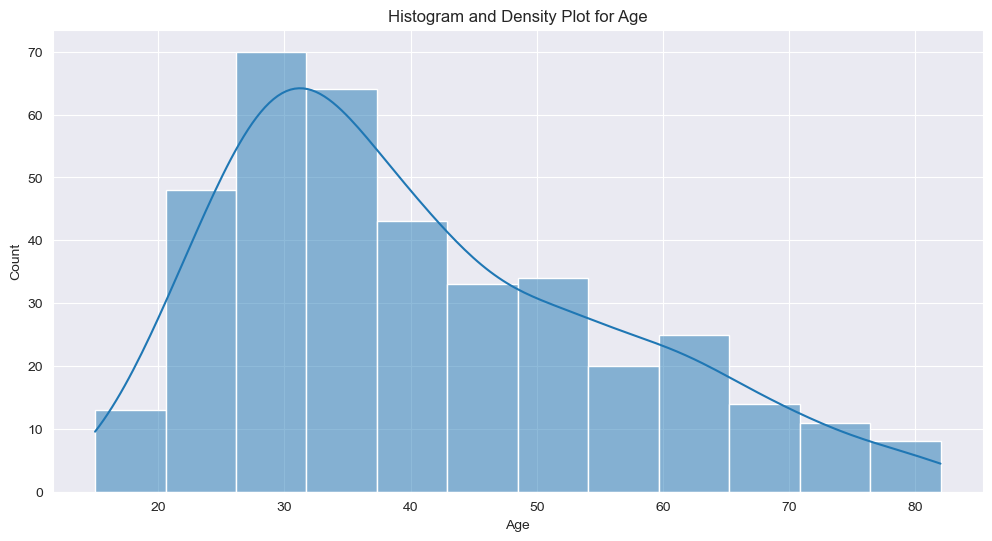

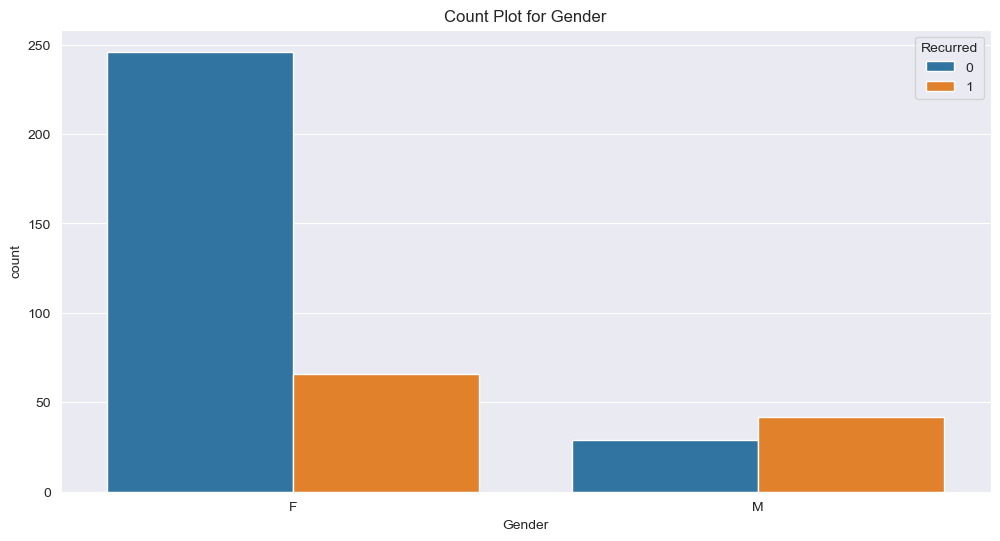

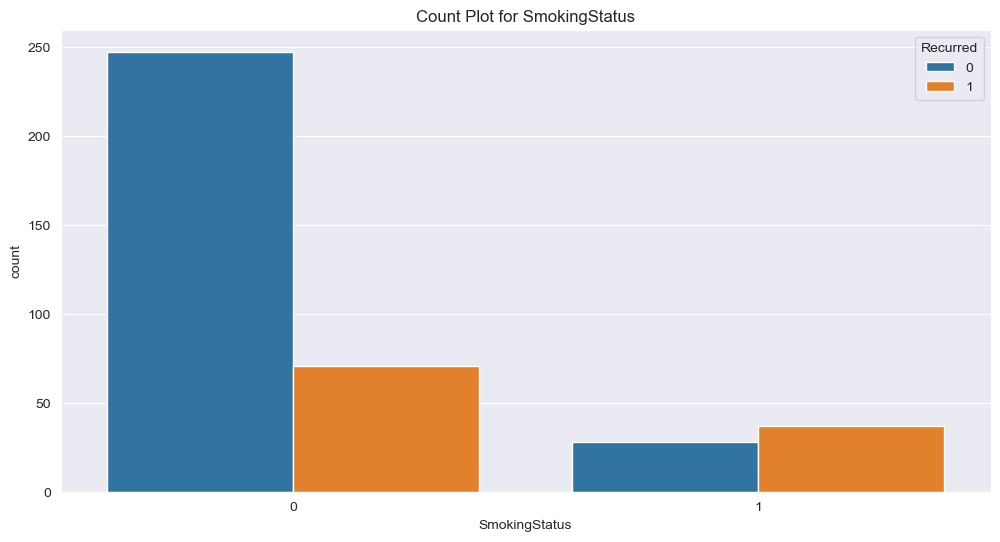

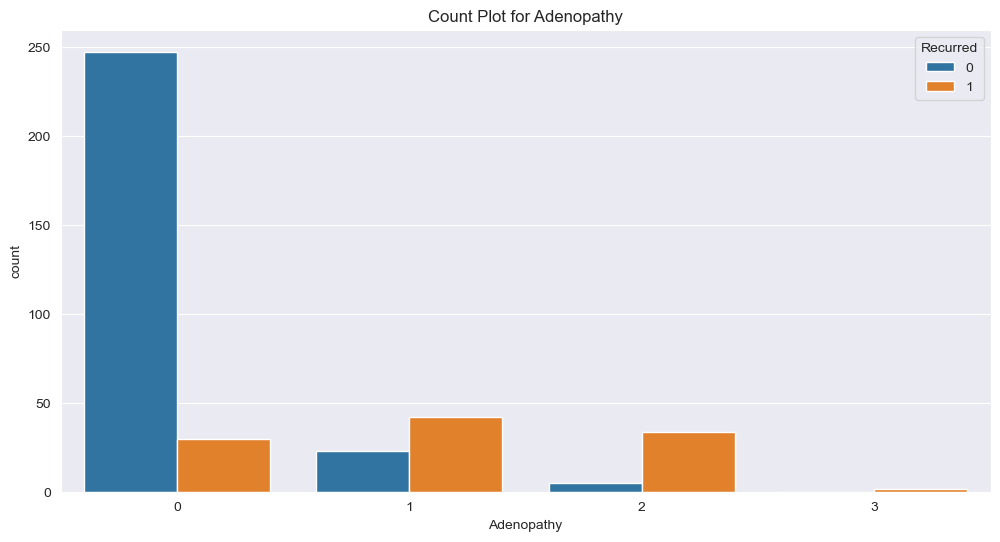

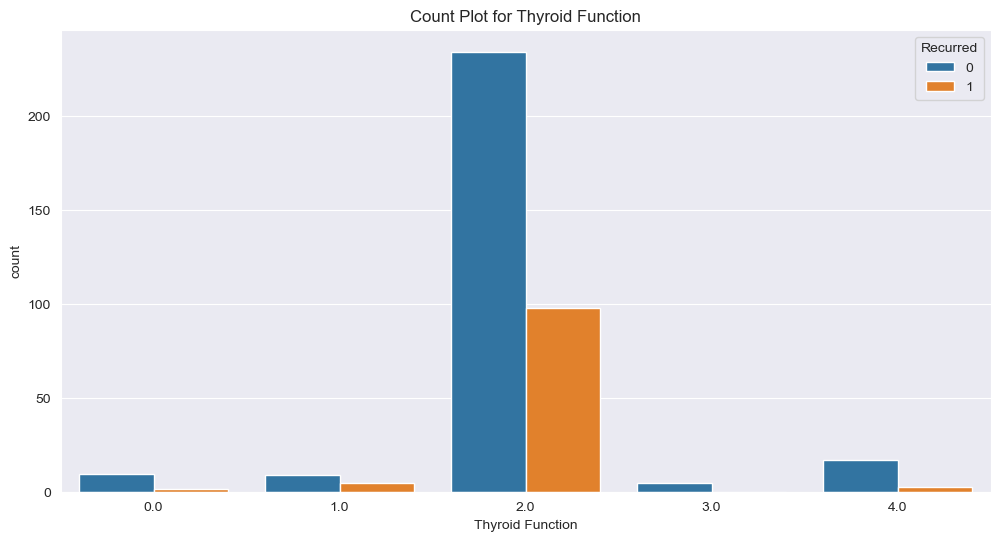

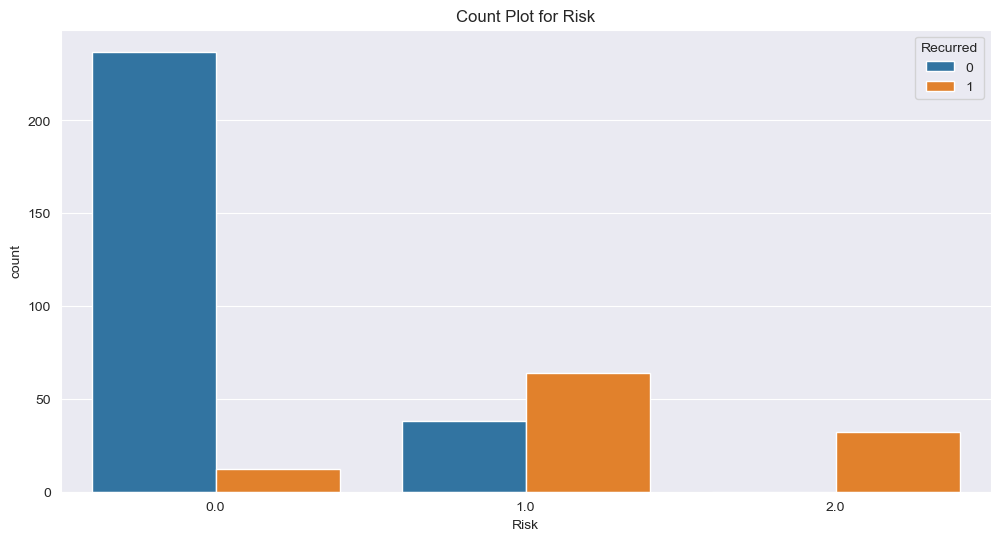

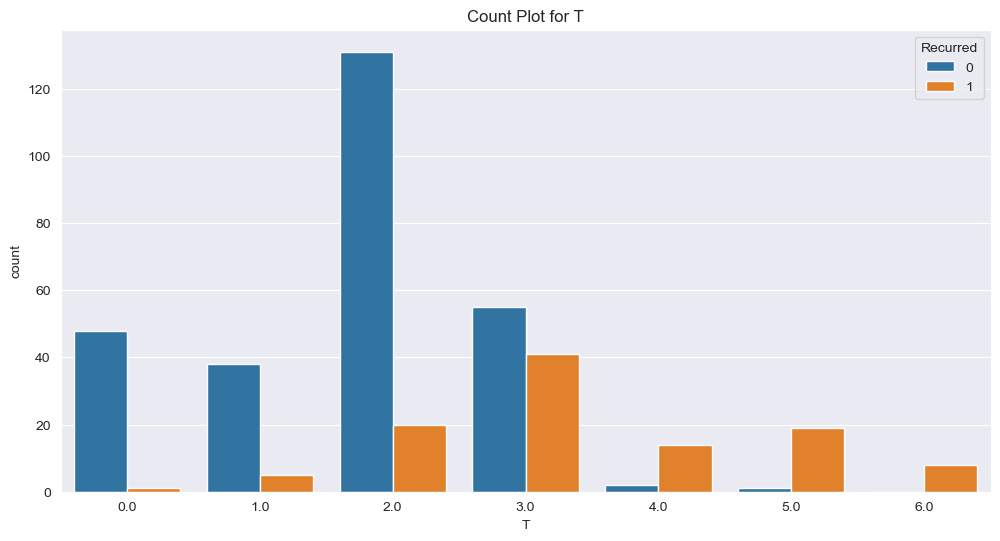

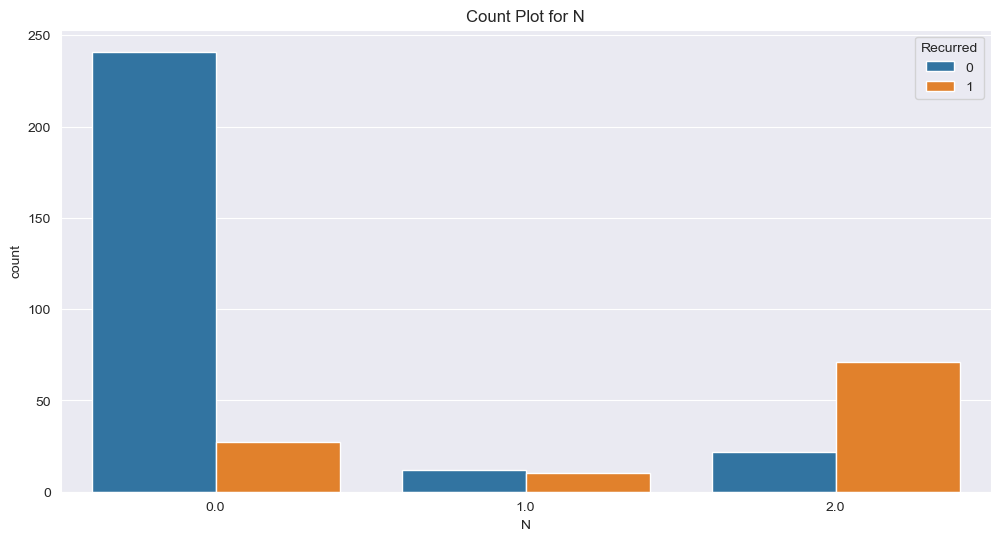

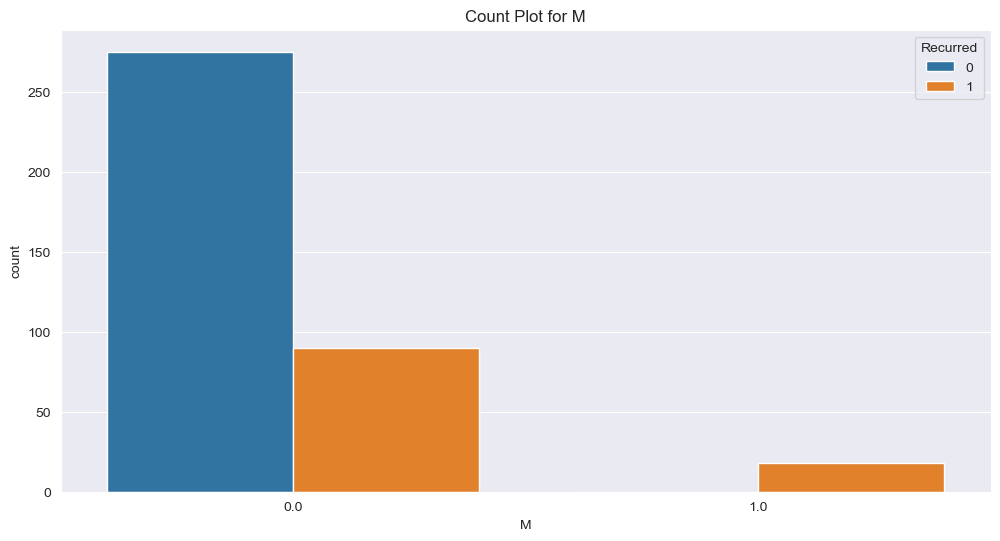

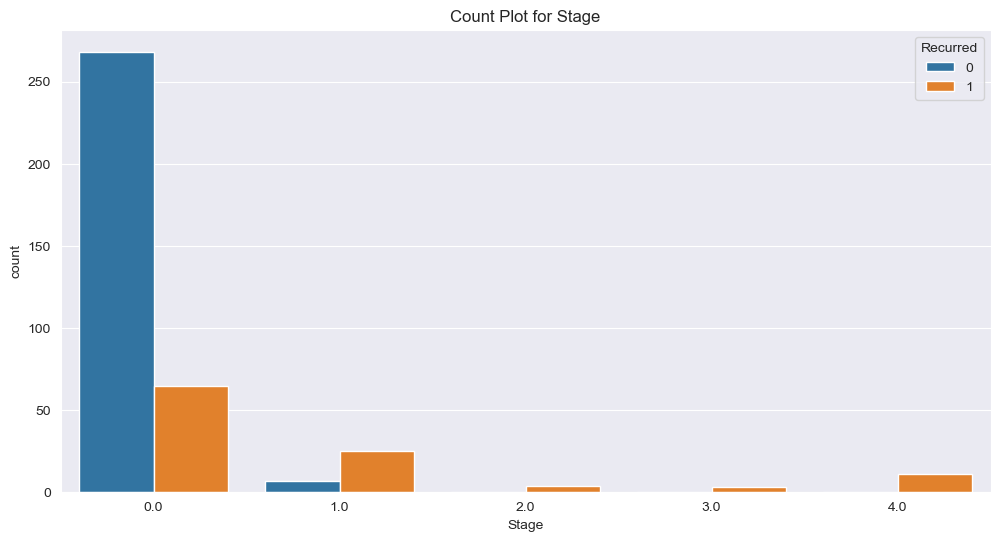

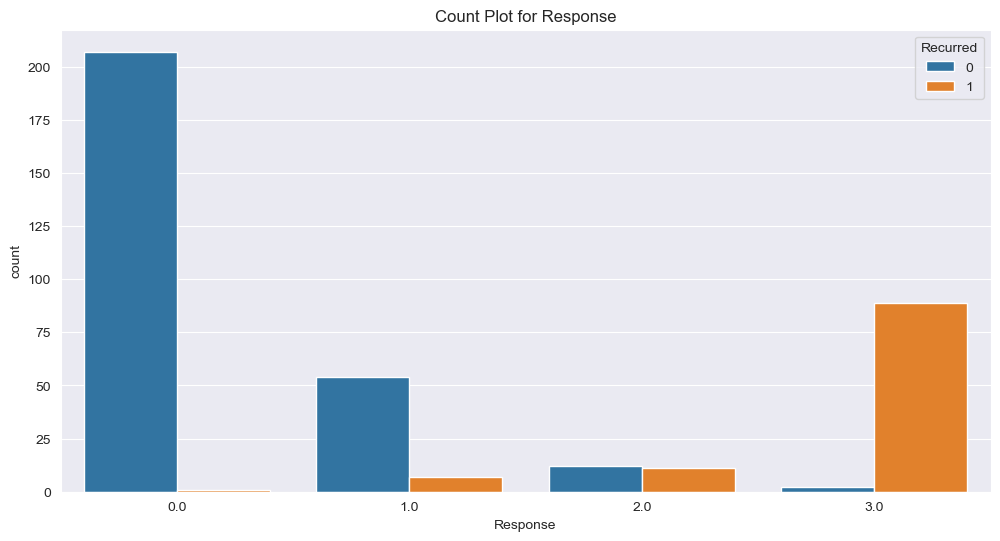

In [10]:
# Histogram and Density Plots for Numerical Features
numeric_features = ['Age']
for feature in numeric_features:
    plt.figure(figsize=(12, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Histogram and Density Plot for {feature}')
    plt.show()

# Count Plots for Categorical Features
categorical_features = ['Gender', 'SmokingStatus', 'Adenopathy', 'Thyroid Function', 'Risk', 'T', 'N', 'M', 'Stage',
                        'Response']
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, x=feature, hue='Recurred')
    plt.title(f'Count Plot for {feature}')
    plt.show()

# Exploratory Data Analysis (EDA)

In this section, I performed Exploratory Data Analysis (EDA) to gain insights into the dataset and understand the relationships between various features and the target variable, which is thyroid cancer recurrence.

## Histogram and Density Plots for Numerical Features

### Age
The histogram and density plot for the 'Age' feature to visualizes the distribution of patients' ages. This plot helps identify the central tendency, spread, and skewness of the age data in the dataset.


## Count Plots for Categorical Features

The count plots for various categorical features to examine the distribution of these features and their relationship with the target variable, 'Recurred'. Count plots are particularly useful for visualizing the frequency of categories within each feature and comparing these frequencies between recurred and non-recurred cases.


### Gender
The count plot for 'Gender' shows the number of male and female patients and how recurrence rates vary between genders. There are more females and a higher recurrence rate among them compared, but within each gender group males seem to have a higher recurrence rate.

### Smoking Status
The count plot for 'SmokingStatus' displays the distribution of smokers and non-smokers in the dataset and their respective recurrence rates. Non-smokers are more prevalent, but recurrence rates are significant among both groups. Again smokers as a subgroup seem to have worse odds of recurrence.

### Adenopathy
The count plot for 'Adenopathy' indicates the number of patients with and without adenopathy and their recurrence rates. Most patients do not have adenopathy, but those with adenopathy have a higher likelihood of recurrence.

### Thyroid Function
The count plot for 'Thyroid Function' illustrates the distribution of different thyroid function statuses among patients and their correlation with recurrence. Normal thyroid function is most common, but abnormal thyroid function is linked with higher recurrence rates.

### Risk
The count plot for 'Risk' categorizes patients based on their risk levels and shows how recurrence rates vary across these categories. Most patients are classified as low risk, but higher risk categories exhibit increased recurrence rates. This corroborates our intuition that higher risk patients are more likely to experience recurrence. It would be useful to prove this with a regression model.

### TNM Staging (T, N, M)
T, N, M are clinical staging categories that divide the cancer characteristiscs through clinical and hsitological findings. The count plots for 'T', 'N', and 'M' show the distribution of patients across these categories and their association with recurrence. More extensive tumors (higher T values), more extensive lymph node involvement (N), and presence metastasis (M) are associated with higher recurrence rates.

### Response
The count plot for 'Response' visualizes the distribution of different treatment responses among patients and their correlation with recurrence. Patients with a complete response to treatment have a lower recurrence rate, while those with partial or no response show higher recurrence rates.

## Summary of Findings
- **Age**: The patient age distribution is right-skewed, with most patients between 20 and 50 years old.
- **Gender**: Females constitute the majority of patients and total amount of recurrence, but the odds must be taken with a grain of salt as the dataset is imbalanced in this regard.
- **Smoking Status**: Non-smokers form the majority, but smokers also show notable recurrence rates.
- **Adenopathy**: Patients without adenopathy are more common, but those with adenopathy have higher recurrence rates.
- **Thyroid Function**: Normal thyroid function is most common, and abnormal function is hard to correlate with higher or lower recurrence just from the plots.
- **Risk**: Most patients are low risk, yet higher risk categories correlate with increased recurrence.
- **TNM**: More extensive involvement are associated with higher recurrence rates.
- **Response**: Complete response to treatment is associated with lower recurrence rates, while partial or no response correlates with higher recurrence.

This EDA provides a foundational understanding of the dataset, highlighting key features and their relationships with thyroid cancer recurrence. These insights will guide the subsequent steps in model building and analysis.


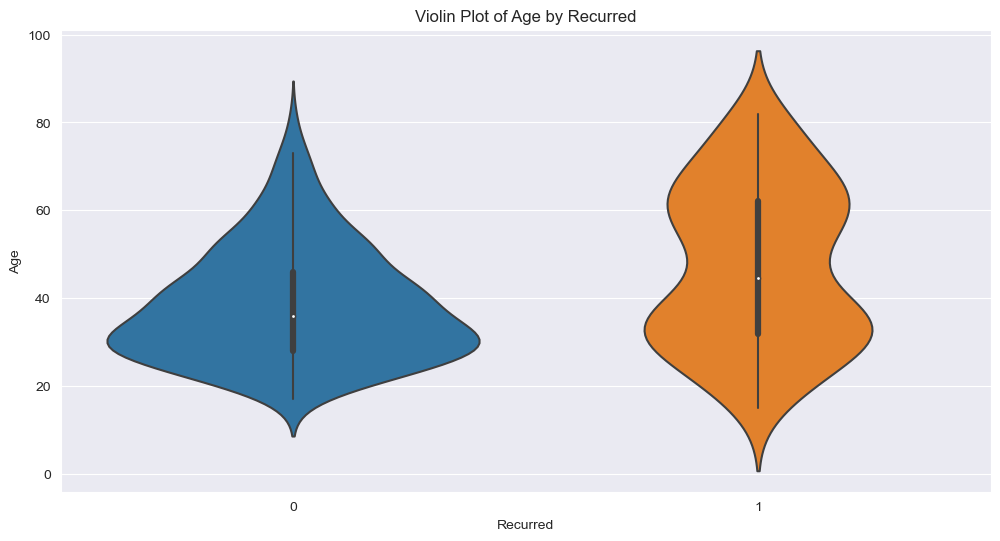

C:\Users\Search\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Search\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Search\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


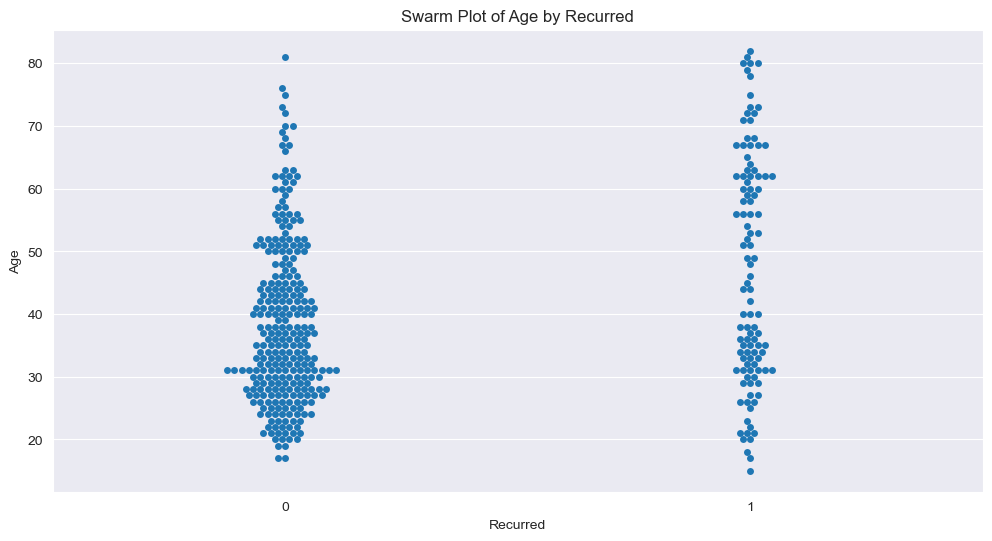

Statistical Summary of Age by Recurred:
          count       mean        std   min    25%   50%   75%   max
Recurred                                                            
0         275.0  38.414545  12.946654  17.0  28.00  36.0  46.0  81.0
1         108.0  47.111111  18.267654  15.0  31.75  44.5  62.0  82.0


C:\Users\Search\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Search\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


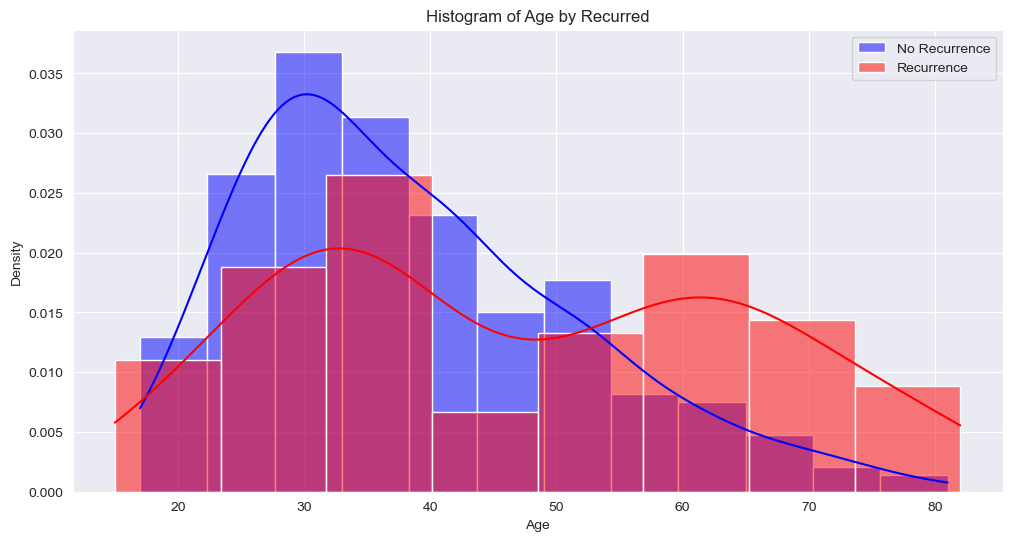

In [11]:
# Box Plots for Numerical Features
# 1. Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Recurred', y='Age', data=data)
plt.title('Violin Plot of Age by Recurred')
plt.show()

# 2. Swarm Plot
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Recurred', y='Age', data=data)
plt.title('Swarm Plot of Age by Recurred')
plt.show()

# 3. Statistical Summary
recurred_summary = data.groupby('Recurred')['Age'].describe()
print("Statistical Summary of Age by Recurred:")
print(recurred_summary)

# 4. Histogram Overlay
plt.figure(figsize=(12, 6))
sns.histplot(data[data['Recurred'] == 0]['Age'], color='blue', label='No Recurrence', kde=True, stat="density")
sns.histplot(data[data['Recurred'] == 1]['Age'], color='red', label='Recurrence', kde=True, stat="density")
plt.legend()
plt.title('Histogram of Age by Recurred')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

## Age Distribution by Recurrence Status
It seems like older age is associated with higher recurrence rates

In [12]:
data.describe()

,Age,Hx Radiotherapy,Thyroid Function,Adenopathy,Risk,T,N,M,Stage,Response,Recurred,SmokingStatus
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,40.866841,0.018277,2.018277,0.389034,0.433420,2.206266,0.543081,0.046997,0.242820,0.992167,0.281984,0.169713
std,15.134494,0.134126,0.620066,0.688412,0.643233,1.344667,0.857732,0.211910,0.773274,1.248010,0.450554,0.375871
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,0.000000,2.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000
max,82.000000,1.000000,4.000000,3.000000,2.000000,6.000000,2.000000,1.000000,4.000000,3.000000,1.000000,1.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       383 non-null    int64  
 1   Gender                    383 non-null    object 
 2   Hx Radiotherapy           383 non-null    int64  
 3   Thyroid Function          383 non-null    float64
 4   Physical Examination      383 non-null    object 
 5   Adenopathy                383 non-null    int64  
 6   Focality                  383 non-null    object 
 7   Risk                      383 non-null    float64
 8   T                         383 non-null    float64
 9   N                         383 non-null    float64
 10  M                         383 non-null    float64
 11  Stage                     383 non-null    float64
 12  Response                  383 non-null    float64
 13  Recurred                  383 non-null    int64  
 14  Pathology_

# Building the model

## Logistic Regression and XGBoost Model Building and Evaluation

We will conduct the following steps to build and evaluate the logistic regression and XGBoost models for predicting thyroid cancer recurrence:

1. **Feature Selection**
2. **Encode Categorical Variables**
3. **Data Split Similarly to the Original Paper**
4. **Logistic Regression Model Training**
- Limit overfitting with regularization : L2, C=1.0, liblinear solver that works well with smaller datasets 
- Prediction and Model Evaluation, variable importance assessment
5. **XGBoost Model Training**
- Prediction and Model Evaluation, variable importance assessment
- Limit overfitting with regularization : Early stopping, Tree parameters, regularization,subsampling

In [14]:
# Feature Selection
features = ['Age', 'Hx RadioTherapy', 'Gender', 'SmokingStatus', 'Adenopathy', 'Thyroid Function', 'Risk', 'T', 'N',
            'M', 'Stage',
            'Response']
target = 'Recurred'

In [15]:
# Encode categorical variables
data = pd.get_dummies(data, columns=['Gender', 'Physical Examination', 'Focality'], drop_first=True)

# Features and target variable
X = data.drop(columns='Recurred')
y = data['Recurred']

# Split the data into training (283 samples) and testing (100 samples) sets
# this is the split according to the original mode'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=42)

In [16]:
# Initialize the first Logistic Regression model
logreg = LogisticRegression(max_iter=10000, random_state=42)
# Train the model
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

Accuracy Score: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.96      0.93      0.95        29

    accuracy                           0.97       100
   macro avg       0.97      0.96      0.96       100
weighted avg       0.97      0.97      0.97       100

Confusion Matrix:
[[70  1]
 [ 2 27]]


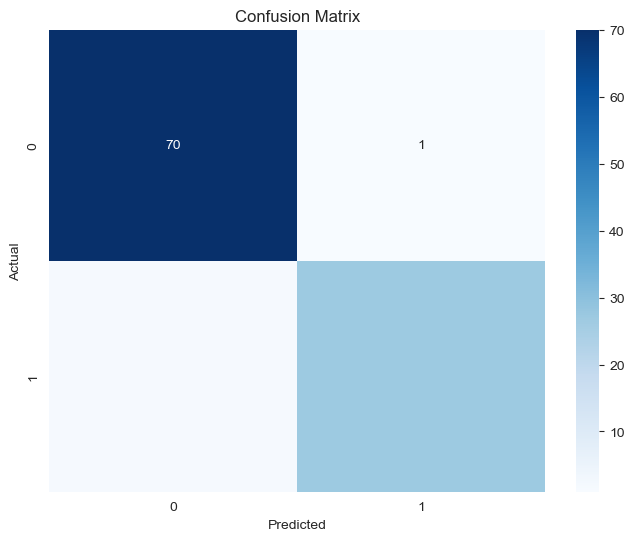

Features coefficients:
                                             Feature  Importance
9                                           Response    2.316468
4                                               Risk    1.326842
6                                                  N    1.010528
15                                          Gender_M    0.699794
8                                              Stage    0.637956
18   Physical Examination_Single nodular goiter-left    0.456987
10                              Pathology_Follicular    0.386850
5                                                  T    0.340985
13                               Pathology_Papillary    0.268837
20                                Focality_Uni-Focal    0.189094
2                                   Thyroid Function    0.174758
0                                                Age    0.021471
7                                                  M    0.020591
1                                    Hx Radiotherapy   -0.005444
12

In [17]:
# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display feature importance (coefficients)
print("Features coefficients:")
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': logreg.coef_[0]})
print(feature_importance.sort_values(by='Importance', ascending=False))

feature_importance_abs = pd.DataFrame({'feature': X.columns, 'importance': abs(logreg.coef_[0])})
feature_importance_abs = feature_importance_abs.sort_values('importance', ascending=False)
print("Top 10 Most Important Features by absolute:")
print(feature_importance_abs.head(10))

In [18]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', max_iter=10000, random_state=42)
# Train the model
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42, solver='liblinear')

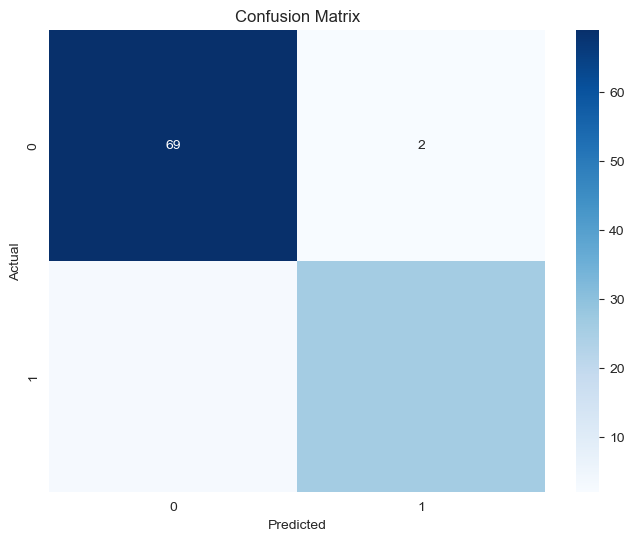

Accuracy Score: 0.95
Confusion Matrix:
 [[69  2]
 [ 3 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.93      0.90      0.91        29

    accuracy                           0.95       100
   macro avg       0.94      0.93      0.94       100
weighted avg       0.95      0.95      0.95       100

Features coefficients:
                                             Feature  Importance
9                                           Response    2.196299
4                                               Risk    1.442829
8                                              Stage    1.159362
15                                          Gender_M    0.755711
6                                                  N    0.646364
10                              Pathology_Follicular    0.144088
7                                                  M    0.043482
1                                    Hx Radiothe

In [19]:
# Make predictions on the test set
y_pred = logreg.predict(X_test)


# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",cm)
print("Classification Report:")
print(classification_report(y_test, y_pred))


# Display feature importance (coefficients)
print("Features coefficients:")
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': logreg.coef_[0]})
print(feature_importance.sort_values(by='Importance', ascending=False))

feature_importance_abs = pd.DataFrame({'feature': X.columns, 'importance': abs(logreg.coef_[0])})
feature_importance_abs = feature_importance_abs.sort_values('importance', ascending=False)
print("Top 10 Most Important Features by absolute:")
print(feature_importance_abs.head(10))

# Logistic Regression Prediction: Model Results and Discussion

## Model Performance

Two logistic regression models were developed for predicting thyroid cancer recurrence: a naive model and a regularized model. Here are the performance metrics for both:

### Naive Model
- **Accuracy Score**: 0.97 (97%)
- **Precision**: 
  - Recurrence (Class 1): 0.96
  - Non-recurrence (Class 0): 0.97
- **Recall**:
  - Recurrence (Class 1): 0.93
  - Non-recurrence (Class 0): 0.99
- **F1-score**:
  - Recurrence (Class 1): 0.95
  - Non-recurrence (Class 0): 0.98

### Confusion Matrix:
```
[[70  1]
 [ 2 27]]
```

### Regularized Model
- **Accuracy Score**: 0.95 (95%)
- **Precision**:
  - Recurrence (Class 1): 0.93
  - Non-recurrence (Class 0): 0.96
- **Recall**:
  - Recurrence (Class 1): 0.90
  - Non-recurrence (Class 0): 0.97
- **F1-score**:
  - Recurrence (Class 1): 0.91
  - Non-recurrence (Class 0): 0.97

### Confusion Matrix:
```
[[69  2]
 [ 3 26]]
```

## Interpretation of Results

### Naive Model
1. **Overall Performance**: The naive model demonstrates excellent overall performance with a 97% accuracy rate, suggesting it is highly effective in predicting thyroid cancer recurrence.
2. **Class-specific Performance**:
   - For non-recurrence (Class 0), the model shows outstanding performance with precision and recall both above 0.97.
   - For recurrence (Class 1), the model performs very well with precision at 0.96 and recall at 0.93.
3. **Confusion Matrix Analysis**: The model has 1 false positive and 2 false negatives. The false negatives, while minimal, are critical in a medical context as they represent missed recurrences.

### Regularized Model
1. **Overall Performance**: The regularized model also performs very well with a 95% accuracy rate. Regularization helps to prevent overfitting, providing a more generalized performance.
2. **Class-specific Performance**:
   - For non-recurrence (Class 0), precision and recall are slightly lower than the naive model but still excellent.
   - For recurrence (Class 1), the model performs well with precision at 0.93 and recall at 0.90.
3. **Confusion Matrix Analysis**: This model has 2 false positives and 3 false negatives. The slight increase in false negatives compared to the naive model is a trade-off for potentially better generalization to new data.

## Feature Importance

### Naive Model
The top 10 most important features by absolute coefficient value are:
1. Response (2.316468)
2. Risk (1.326842)
3. N (1.010528)
4. Gender_M (0.699794)
5. Stage (0.637956)
6. Pathology_Hurthle cell (-0.621770)
7. Physical Examination_Single nodular goiter-left (0.456987)
8. Pathology_Follicular (0.386850)
9. Adenopathy (-0.360159)
10. T (0.340985)

### Regularized Model
The top 10 most important features by absolute coefficient value are:
1. Response (2.196299)
2. Risk (1.442829)
3. Stage (1.159362)
4. Pathology_Hurthle cell (-0.766535)
5. Gender_M (0.755711)
6. N (0.646364)
7. Physical Examination_Multinodular goiter (-0.626742)
8. Pathology_Papillary (-0.563785)
9. Physical Examination_Single nodular goiter-right (-0.537858)
10. Thyroid Function (-0.419373)

## Discussion and Ramifications

### Naive Model
1. **Risk Assessment**: The 'Risk' feature is highly important, underscoring the need for comprehensive initial evaluations.
2. **Treatment Response**: 'Response' is the most crucial feature, indicating the significance of monitoring patient response to treatment.
3. **Gender Disparity**: 'Gender_M' suggests that male patients may be at higher risk of recurrence, necessitating more intensive follow-up for males.
4. **Pathology Types**: Different pathology types (Hurthle cell, Follicular) have varying impacts, which could influence treatment plans.
5. **Tumor Characteristics**: The TNM staging system is validated by the importance of 'T', 'N', and 'Stage' features.

### Regularized Model
1. **Generalization**: Regularization helps to prevent overfitting, suggesting this model may perform better on new, unseen data.
2. **Feature Stability**: Important features remain consistent with slight variations in coefficient values, indicating robust findings.
3. **Performance Trade-offs**: The slight decrease in accuracy and increase in false negatives highlight a trade-off for better generalization.

### Conclusion
Both models provide valuable insights into thyroid cancer recurrence prediction, with the naive model showing slightly higher accuracy and the regularized model offering potentially better generalization. Key features like 'Response', 'Risk', and 'Stage' are crucial across both models, highlighting important areas for clinical focus. Further validation on larger datasets and exploration of more complex models could enhance these findings.

## Limitations and Future Directions
1. **Sample Size**: Validation on larger datasets is necessary for increased confidence.
2. **Model Complexity**: Exploring non-linear relationships with more complex models may uncover additional insights.
3. **False Negatives**: Focus on reducing false negatives to avoid missed recurrences.
4. **Temporal Aspects**: Incorporating time-to-recurrence data could provide deeper insights.
5. **External Validation**: Testing on data from different populations would assess generalizability.

These models offer a promising approach to predicting thyroid cancer recurrence, providing a tool to support clinical decision-making. Further refinement and validation are essential for improving their utility in clinical practice.

## XGBoost model

In [20]:
# Initial XGBoost Model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

Confusion Matrix:
[[70  1]
 [ 1 28]]


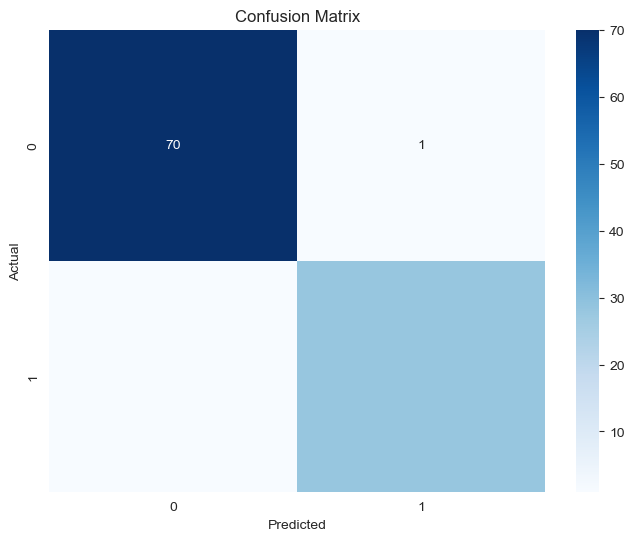

Accuracy Score: 0.98
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.97      0.97      0.97        29

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

XGBoost Confusion Matrix:
[[70  1]
 [ 1 28]]
XGBoost Accuracy Score: 0.98
XGBoost Feature Importance:
                                             Feature  Importance
9                                           Response    0.612002
4                                               Risk    0.119576
15                                          Gender_M    0.043857
18   Physical Examination_Single nodular goiter-left    0.043446
0                                                Age    0.027042
10                              Pathology_Follicular    0.025692
6                                                  N    0.023542

In [21]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate XGBoost Model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred))
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("XGBoost Accuracy Score:", accuracy_score(y_test, y_pred))

# Feature importance for XGBoost
xgb_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_})
print("XGBoost Feature Importance:")
print(xgb_feature_importance.sort_values(by='Importance', ascending=False))

In [22]:
# Define XGBoost parameters with regularization and subsampling
params = {
    'use_label_encoder': False,
    'eval_metric': 'logloss',
    'max_depth': 4,                  # Limit the max depth of trees
    'min_child_weight': 1,           # Minimum sum of instance weight (hessian) needed in a child
    'gamma': 0.1,                    # Minimum loss reduction required to make a further partition
    'subsample': 0.8,                # Fraction of observations to be randomly sampled for each tree
    'colsample_bytree': 0.8,         # Fraction of columns to be randomly sampled for each tree
    'lambda': 1,                     # L2 regularization term on weights
    'alpha': 0                       # L1 regularization term on weights
}

# Train the XGBoost model with early stopping
xgb_model = xgb.XGBClassifier(**params)
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    early_stopping_rounds=10,
    verbose=True
)
# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

[0]	validation_0-logloss:0.39800	validation_1-logloss:0.40189
[1]	validation_0-logloss:0.30185	validation_1-logloss:0.30366
[2]	validation_0-logloss:0.25261	validation_1-logloss:0.26630
[3]	validation_0-logloss:0.20556	validation_1-logloss:0.21635
[4]	validation_0-logloss:0.17429	validation_1-logloss:0.17921
[5]	validation_0-logloss:0.15465	validation_1-logloss:0.16716
[6]	validation_0-logloss:0.13324	validation_1-logloss:0.15137
[7]	validation_0-logloss:0.11826	validation_1-logloss:0.13456
[8]	validation_0-logloss:0.10707	validation_1-logloss:0.13038
[9]	validation_0-logloss:0.09960	validation_1-logloss:0.12570
[10]	validation_0-logloss:0.08896	validation_1-logloss:0.12042
[11]	validation_0-logloss:0.08238	validation_1-logloss:0.11857
[12]	validation_0-logloss:0.07846	validation_1-logloss:0.11533
[13]	validation_0-logloss:0.07459	validation_1-logloss:0.10847
[14]	validation_0-logloss:0.07157	validation_1-logloss:0.11058
[15]	validation_0-logloss:0.06779	validation_1-logloss:0.10589
[1

C:\Users\Search\miniconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Confusion Matrix:
[[68  3]
 [ 2 27]]


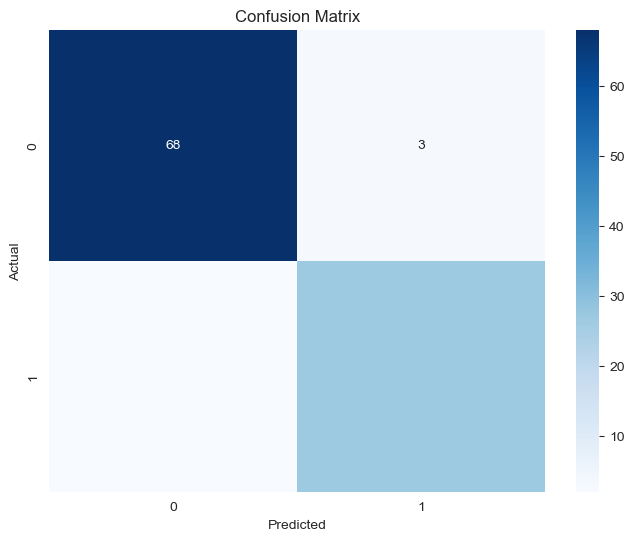

Accuracy Score: 0.95
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.90      0.93      0.92        29

    accuracy                           0.95       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.95      0.95      0.95       100

XGBoost Confusion Matrix:
[[68  3]
 [ 2 27]]
XGBoost Accuracy Score: 0.95
XGBoost Feature Importance:
                                             Feature  Importance
9                                           Response    0.459289
4                                               Risk    0.246148
8                                              Stage    0.048846
15                                          Gender_M    0.046575
6                                                  N    0.029032
0                                                Age    0.028519
18   Physical Examination_Single nodular goiter-left    0.025856

In [23]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate XGBoost Model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred))
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("XGBoost Accuracy Score:", accuracy_score(y_test, y_pred))

# Feature importance for XGBoost
xgb_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_})
print("XGBoost Feature Importance:")
print(xgb_feature_importance.sort_values(by='Importance', ascending=False))

# Comparative Analysis of Logistic Regression and XGBoost Models for Thyroid Cancer Recurrence Prediction

## Model Performance

### Logistic Regression Models

#### Naive Logistic Regression
- **Accuracy Score**: 0.97 (97%)
- **Precision**: 
  - Recurrence (Class 1): 0.96
  - Non-recurrence (Class 0): 0.97
- **Recall**:
  - Recurrence (Class 1): 0.93
  - Non-recurrence (Class 0): 0.99
- **F1-score**:
  - Recurrence (Class 1): 0.95
  - Non-recurrence (Class 0): 0.98

#### Confusion Matrix:
```
[[70  1]
 [ 2 27]]
```

#### Regularized Logistic Regression
- **Accuracy Score**: 0.95 (95%)
- **Precision**:
  - Recurrence (Class 1): 0.93
  - Non-recurrence (Class 0): 0.96
- **Recall**:
  - Recurrence (Class 1): 0.90
  - Non-recurrence (Class 0): 0.97
- **F1-score**:
  - Recurrence (Class 1): 0.91
  - Non-recurrence (Class 0): 0.97

#### Confusion Matrix:
```
[[69  2]
 [ 3 26]]
```

### XGBoost Models

#### Naive XGBoost
- **Accuracy Score**: 0.98 (98%)
- **Precision**:
  - Recurrence (Class 1): 0.97
  - Non-recurrence (Class 0): 0.99
- **Recall**:
  - Recurrence (Class 1): 0.97
  - Non-recurrence (Class 0): 0.99
- **F1-score**:
  - Recurrence (Class 1): 0.97
  - Non-recurrence (Class 0): 0.99

#### Confusion Matrix:
```
[[70  1]
 [ 1 28]]
```

#### Regularized XGBoost
- **Accuracy Score**: 0.95 (95%)
- **Precision**:
  - Recurrence (Class 1): 0.90
  - Non-recurrence (Class 0): 0.97
- **Recall**:
  - Recurrence (Class 1): 0.93
  - Non-recurrence (Class 0): 0.96
- **F1-score**:
  - Recurrence (Class 1): 0.92
  - Non-recurrence (Class 0): 0.96

#### Confusion Matrix:
```
[[68  3]
 [ 2 27]]
```

## Interpretation of Results

### Overall Performance

- **Naive Logistic Regression**: Demonstrates excellent performance with an accuracy of 97%. It balances well between precision and recall for both classes, showing minimal false negatives and false positives.
- **Regularized Logistic Regression**: Shows slightly lower accuracy at 95%, which is a trade-off for better generalization. It still maintains a good balance but has slightly more false negatives.
- **Naive XGBoost**: Outperforms all with an accuracy of 98%, displaying near-perfect precision and recall. It minimizes false negatives and false positives effectively.
- **Regularized XGBoost**: Matches the accuracy of regularized logistic regression at 95%, with balanced precision and recall. It shows robust performance, suggesting effective regularization.

### Class-specific Performance

- **Naive Models**: Both naive models (logistic regression and XGBoost) show strong performance, but XGBoost is slightly better with fewer false negatives and false positives.
- **Regularized Models**: Both regularized models achieve the same accuracy, but XGBoost maintains a better balance in precision and recall compared to regularized logistic regression.

### Confusion Matrix Analysis

- **Naive Logistic Regression**: 1 false positive and 2 false negatives.
- **Regularized Logistic Regression**: 2 false positives and 3 false negatives.
- **Naive XGBoost**: 1 false positive and 1 false negative.
- **Regularized XGBoost**: 3 false positives and 2 false negatives.

## Feature Importance

### Logistic Regression

#### Naive Model
Top 10 most important features by absolute coefficient value:
1. Response (2.316468)
2. Risk (1.326842)
3. N (1.010528)
4. Gender_M (0.699794)
5. Stage (0.637956)
6. Pathology_Hurthle cell (-0.621770)
7. Physical Examination_Single nodular goiter-left (0.456987)
8. Pathology_Follicular (0.386850)
9. Adenopathy (-0.360159)
10. T (0.340985)

#### Regularized Model
Top 10 most important features by absolute coefficient value:
1. Response (2.196299)
2. Risk (1.442829)
3. Stage (1.159362)
4. Pathology_Hurthle cell (-0.766535)
5. Gender_M (0.755711)
6. N (0.646364)
7. Physical Examination_Multinodular goiter (-0.626742)
8. Pathology_Papillary (-0.563785)
9. Physical Examination_Single nodular goiter-right (-0.537858)
10. Thyroid Function (-0.419373)

### XGBoost

#### Naive Model
Top 10 most important features by importance score:
1. Response (0.612002)
2. Risk (0.119576)
3. Gender_M (0.043857)
4. Physical Examination_Single nodular goiter-left (0.043446)
5. Age (0.027042)
6. Pathology_Follicular (0.025692)
7. N (0.023542)
8. Physical Examination_Multinodular goiter (0.021249)
9. T (0.019295)
10. Adenopathy (0.017831)

#### Regularized Model
Top 10 most important features by importance score:
1. Response (0.459289)
2. Risk (0.246148)
3. Stage (0.048846)
4. Gender_M (0.046575)
5. N (0.029032)
6. Age (0.028519)
7. Physical Examination_Single nodular goiter-left (0.025856)
8. Adenopathy (0.025753)
9. Physical Examination_Single nodular goiter-right (0.025418)
10. T (0.024086)

## Discussion and Insights and conclusions

### Model Performance

- **XGBoost Superiority**: The naive XGBoost model outperforms all with the highest accuracy, precision, and recall, making it the most reliable for minimizing false negatives.
- **Regularization Effects**: Both regularized models show robust performance, but the regularized XGBoost maintains a better balance compared to regularized logistic regression, indicating effective handling of overfitting.

### Feature Importance

- **Consistent Key Features**: Both models highlight 'Response' and 'Risk' as critical features, reinforcing their importance in predicting recurrence.
- **Differences in Emphasis**: XGBoost models place more importance on physical examination features and age, capturing more complex relationships that logistic regression might miss.

### Implications for Clinical Practice

- **Model Selection**: The naive XGBoost model is preferable due to its superior performance, especially in reducing false negatives, which is crucial in a medical context.
- **Feature Importance**: Both models emphasize the need for thorough initial evaluations and monitoring of treatment response. XGBoost's emphasis on physical examination findings suggests the value of detailed physical exams.
- **Generalization vs. Performance**: Regularized models, particularly XGBoost, offer better generalization while maintaining strong performance, making them suitable for broader application in clinical settings.

## Limitations and Future Directions

1. **Model Complexity**: XGBoost's complexity requires careful implementation and explanation in clinical settings.
2. **Interpretability**: Logistic regression's interpretability remains advantageous, suggesting a potential combined approach.
3. **External Validation**: Further validation on diverse datasets is necessary to ensure generalizability. For instance, I assumed that the regularized version is "better" because they were regularized, but this is not necessarily the case. Assessing whether they are indeed better and why would be a good next step. If not, looking into alternative regularization approaches could be helpful.
4. **Feature Engineering**: Further exploration of complex interactions and non-linear relationships could enhance model performance.
5. **Ensemble Methods**: Combining the strengths of both models might offer an optimal balance of performance and interpretability.

In conclusion, while both logistic regression and XGBoost models provide valuable insights for predicting thyroid cancer recurrence, the naive XGBoost model stands out with its superior performance. Its ability to capture complex relationships makes it a powerful tool for clinical decision-making. However, the interpretability of logistic regression remains beneficial, suggesting a combined approach could maximize both accuracy and clinical applicability.